# Curso de Big Data. Otoño 2024 - Grupo 4
# Trabajo Práctico 2
## Integrantes: Federico Saucedo, Manuel Soares Gache y Maximiliano Cucher

## Parte I: Limpieza de la base

In [1]:
import pandas as pd
base = pd.read_csv('Base Airbnb NY.csv')

### Ejercicio 1

### Inciso a)

In [2]:
base_sin_duplicados = base.drop_duplicates() #usamos el comando drop_duplicates para eliminar los duplicados

In [3]:
# Comprobamos si habia algun dato duplicado
print("Longitud original:", len(base)) 
print("Longitud después de eliminar duplicados:", len(base_sin_duplicados))

Longitud original: 48905
Longitud después de eliminar duplicados: 48895


In [4]:
# Exportamos la base de datos sin duplicados a un archivo csv
base_sin_duplicados.to_csv('Base_sin_duplicados.csv', index=False)

### Inciso b)

In [5]:
# Creamos una varaible con las acolumans que vamos a eliminar
columnas_a_eliminar = ['id', 'name', 'host_id', 'host_name']

# Creeamos una variable llamada base_modificada que no tenga las 4 que seleccionamos
base_b = base_sin_duplicados.drop(columns=columnas_a_eliminar)

In [6]:
base_b.to_csv('Base_modificada.csv', index=False)

### Inciso c)

In [7]:
# Contamos el nuemro de missing values de cada columna
missing_values_por_columna = base_b.isna().sum()

# Mostramos esto, y vemos que unicamcente Price, last_review y reviews_per_month tienen missing values.
print("Número de valores faltantes por columna:")
print(missing_values_por_columna)

Número de valores faltantes por columna:
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                15
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [8]:
# Reemplazar los valores faltantes por 0 en las columnas 'last_review' y 'reviews_per_month'
base_b['last_review'].fillna(0, inplace=True)
base_b['reviews_per_month'].fillna(0, inplace=True)

In [9]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Verificar si hay valores faltantes en la columna 'price'
if base_b['price'].isna().sum() > 0:
    # Realizar codificación one-hot en las columnas categóricas
    data_codificado = pd.get_dummies(base_b)

    # Eliminar la columna 'last_review' si está presente
    if 'last_review' in data_codificado.columns:
        data_codificado = data_codificado.drop(columns=['last_review'])

    # Separar las columnas predictoras y la columna target
    X = data_codificado.drop(columns=['price'])  # Columnas predictoras
    y = base_b['price']  # Variable objetivo

    # Filtrar los datos completos (sin valores faltantes) para entrenar el modelo
    X_train = X[~y.isna()]
    y_train = y[~y.isna()]

    # Entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predecir los valores faltantes
    X_missing = X[y.isna()]
    predicted_prices = model.predict(X_missing)

    # Agregar los valores predichos a los valores faltantes en el DataFrame original
    base_b.loc[base_b['price'].isna(), 'price'] = predicted_prices

    # Exportar el DataFrame con los valores faltantes estimados a un archivo CSV
    base_b.to_csv('Base_inciso_c.csv', index=False)
    print("Valores faltantes de 'price' han sido predichos y reemplazados.")
else:
    print("No hay valores faltantes en la columna 'price'.")


Valores faltantes de 'price' han sido predichos y reemplazados.


In [10]:
#Comporbamos que ya no hayan missing values
base_c = pd.read_csv('Base_inciso_c.csv')
# Contamos el nuemro de missing values de cada columna
missing_values_por_columna = base_b.isna().sum()

# Mostramos esto, y vemos que unicamcente Price, last_review y reviews_per_month tienen missing values.
print("Número de valores faltantes por columna:")
print(missing_values_por_columna)

Número de valores faltantes por columna:
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


### Inciso d)

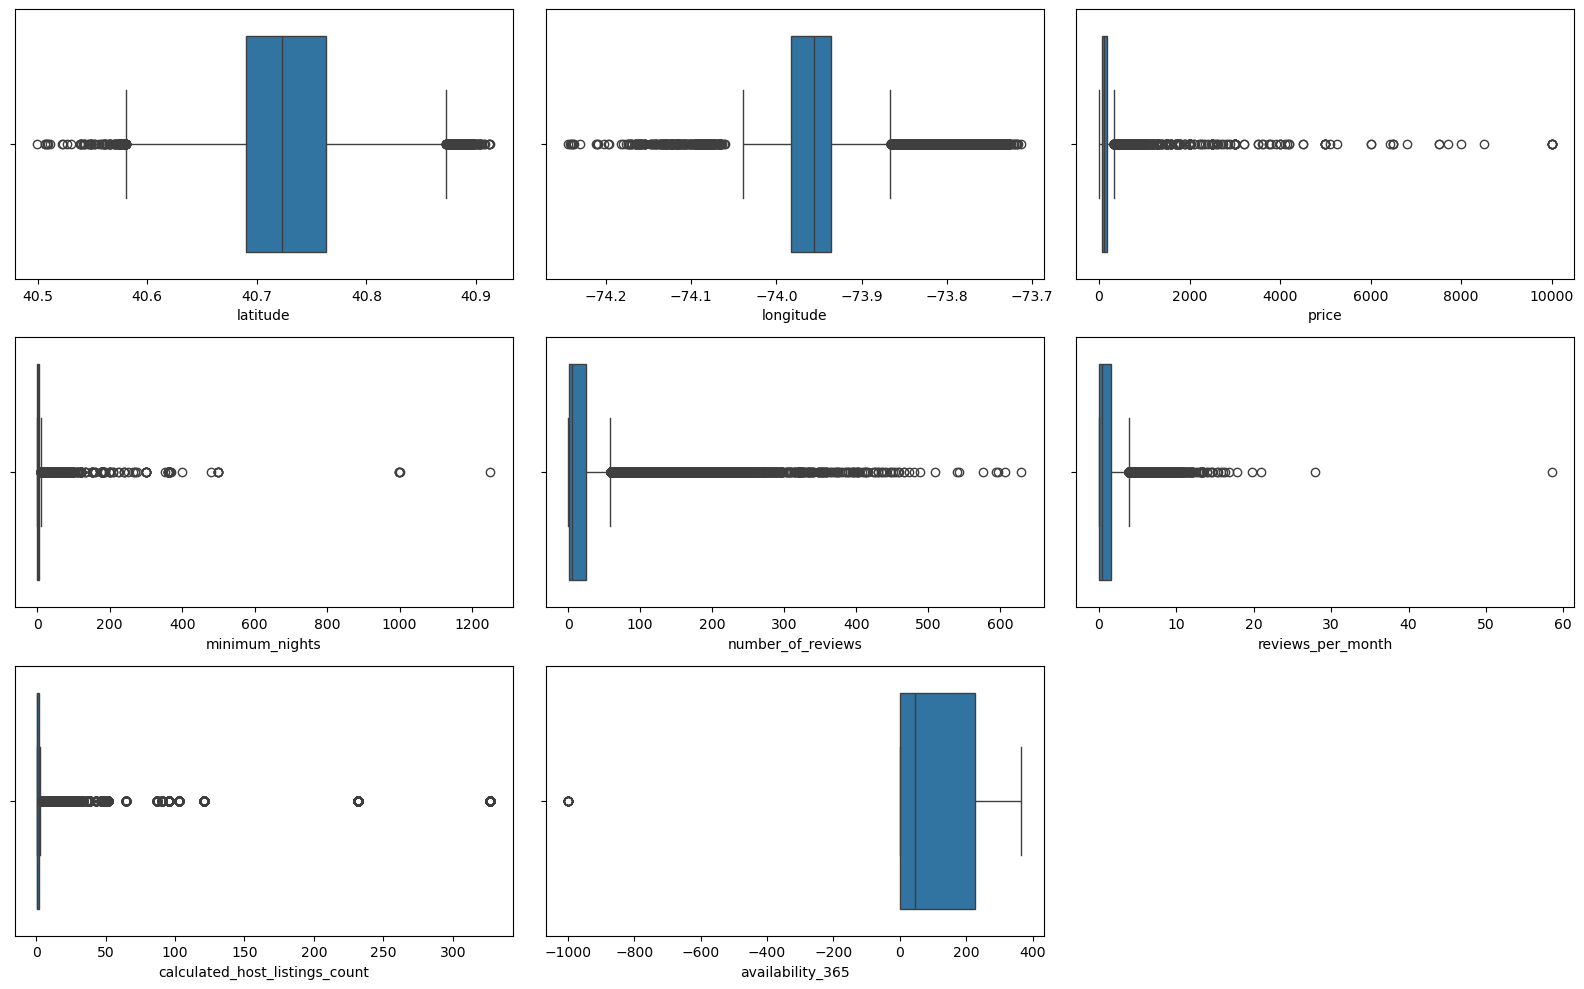

In [11]:
# Graficamos box plots para cada varaible para verificar en que variable pueden haber outliers y si es prudente eliminarlos

import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las columnas numéricas
df_numeric = base_c.select_dtypes(include=['number'])

# Configurar el tamaño de la figura
plt.figure(figsize=(16, 10))

# Crear un boxplot para cada columna numérica
for i, col in enumerate(df_numeric.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df_numeric[col])
    plt.xlabel(col)

# Ajustar el diseño de los subplots
plt.tight_layout()

# Mostrar los boxplots
plt.show()

In [12]:
# Eliminar los valores negativos de 'availability_365'
base_d = base_c[base_c['availability_365'] >= 0]

# Eliminar los valores mayores a 30 de 'reviews_per_month'
base_d = base_d[base_d['reviews_per_month'] <= 30]

# Calcular el valor del percentil 99 de 'minimum_nights'
percentil_99 = base_d['minimum_nights'].quantile(0.99)

# Filtrar el DataFrame para eliminar los valores del 1% más alto de 'minimum_nights'
base_d = base_d[base_d['minimum_nights'] <= percentil_99]

# Eliminar valores de 'price' menores o iguales a 0
base_d = base_d[base_d['price'] > 0]


In [13]:
base_d.to_csv('Base_inciso_d.csv', index=False)

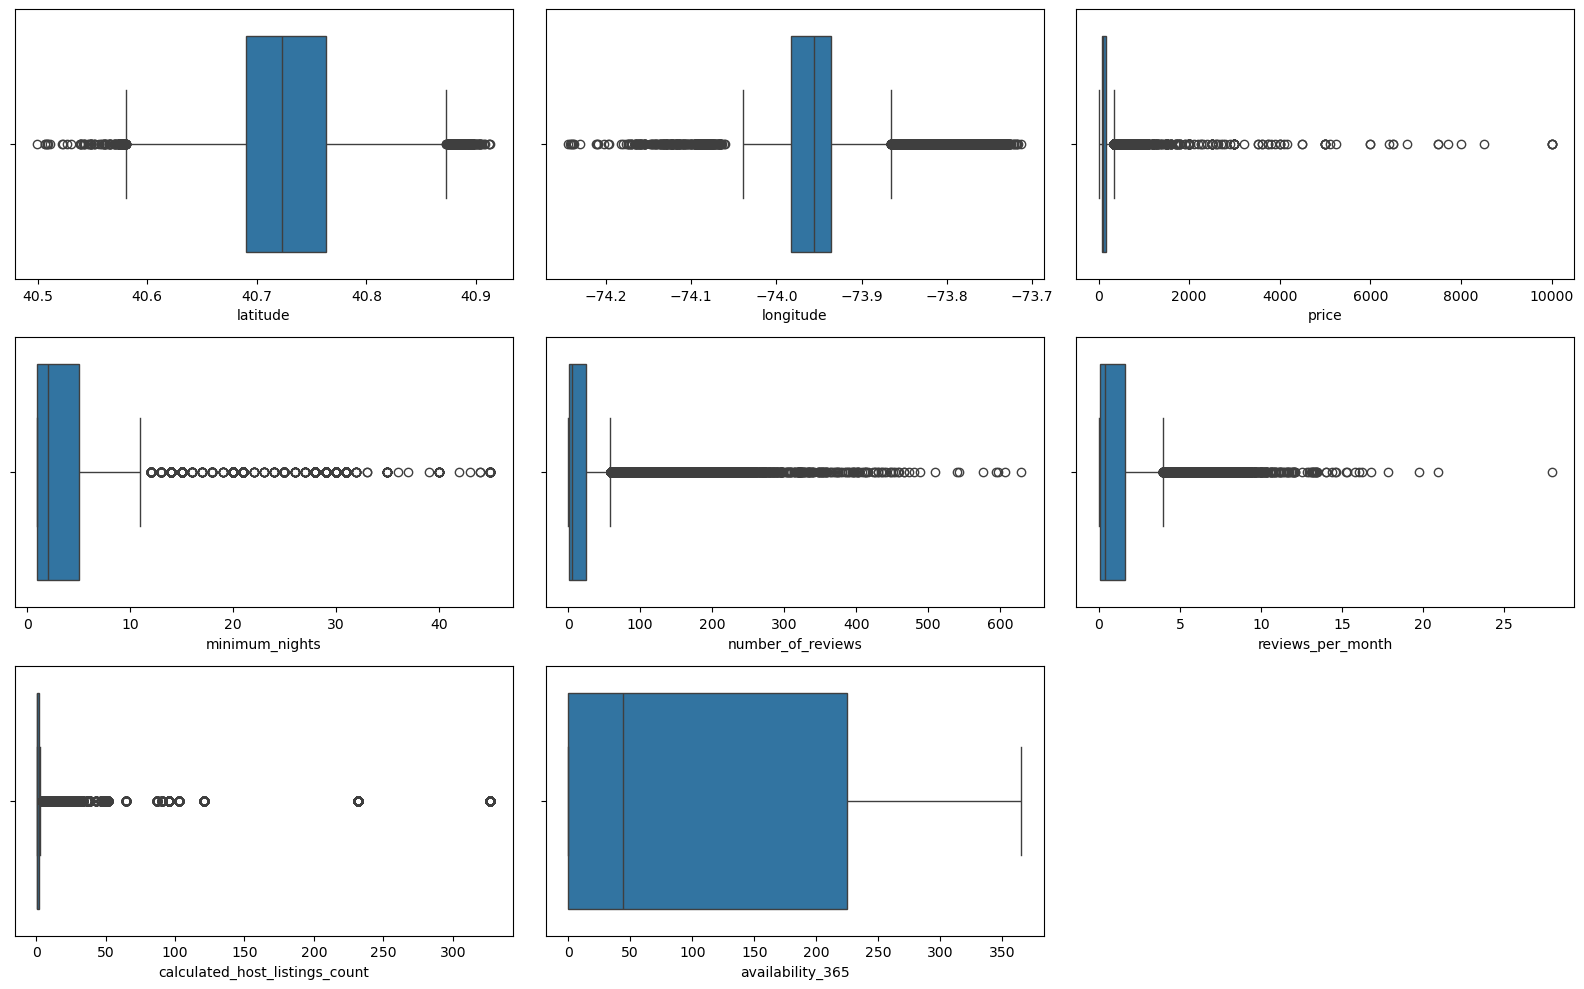

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las columnas numéricas
df_numeric = base_d.select_dtypes(include=['number'])

# Configurar el tamaño de la figura
plt.figure(figsize=(16, 10))

# Crear un boxplot para cada columna numérica
for i, col in enumerate(df_numeric.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df_numeric[col])
    plt.xlabel(col)

# Ajustar el diseño de los subplots
plt.tight_layout()

# Mostrar los boxplots
plt.show()

### Inciso (e)

In [15]:
# Con el comando get_dummies pasamos a varaibles numericas las columnas categóricas 'neighbourhood_group' y 'room_type'
base_e = pd.get_dummies(base_d, columns=['neighbourhood_group', 'room_type'])

### Inciso (f)

In [16]:
# Paso 1: Calcular el número de oferentes por cada grupo de vecindarios
offer_counts = base_e[['neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
                       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
                       'neighbourhood_group_Staten Island']].sum()

# Paso 2: Crear un DataFrame con los resultados
offer_counts_df = pd.DataFrame(offer_counts, columns=['offer_group']).reset_index()

# Paso 3: Imprimir el DataFrame con los resultados
print(offer_counts_df)


                               index  offer_group
0          neighbourhood_group_Bronx         1077
1       neighbourhood_group_Brooklyn        19924
2      neighbourhood_group_Manhattan        21395
3         neighbourhood_group_Queens         5631
4  neighbourhood_group_Staten Island          372


## Parte II: Gráficos y visualizaciones

## Ejercicio 1

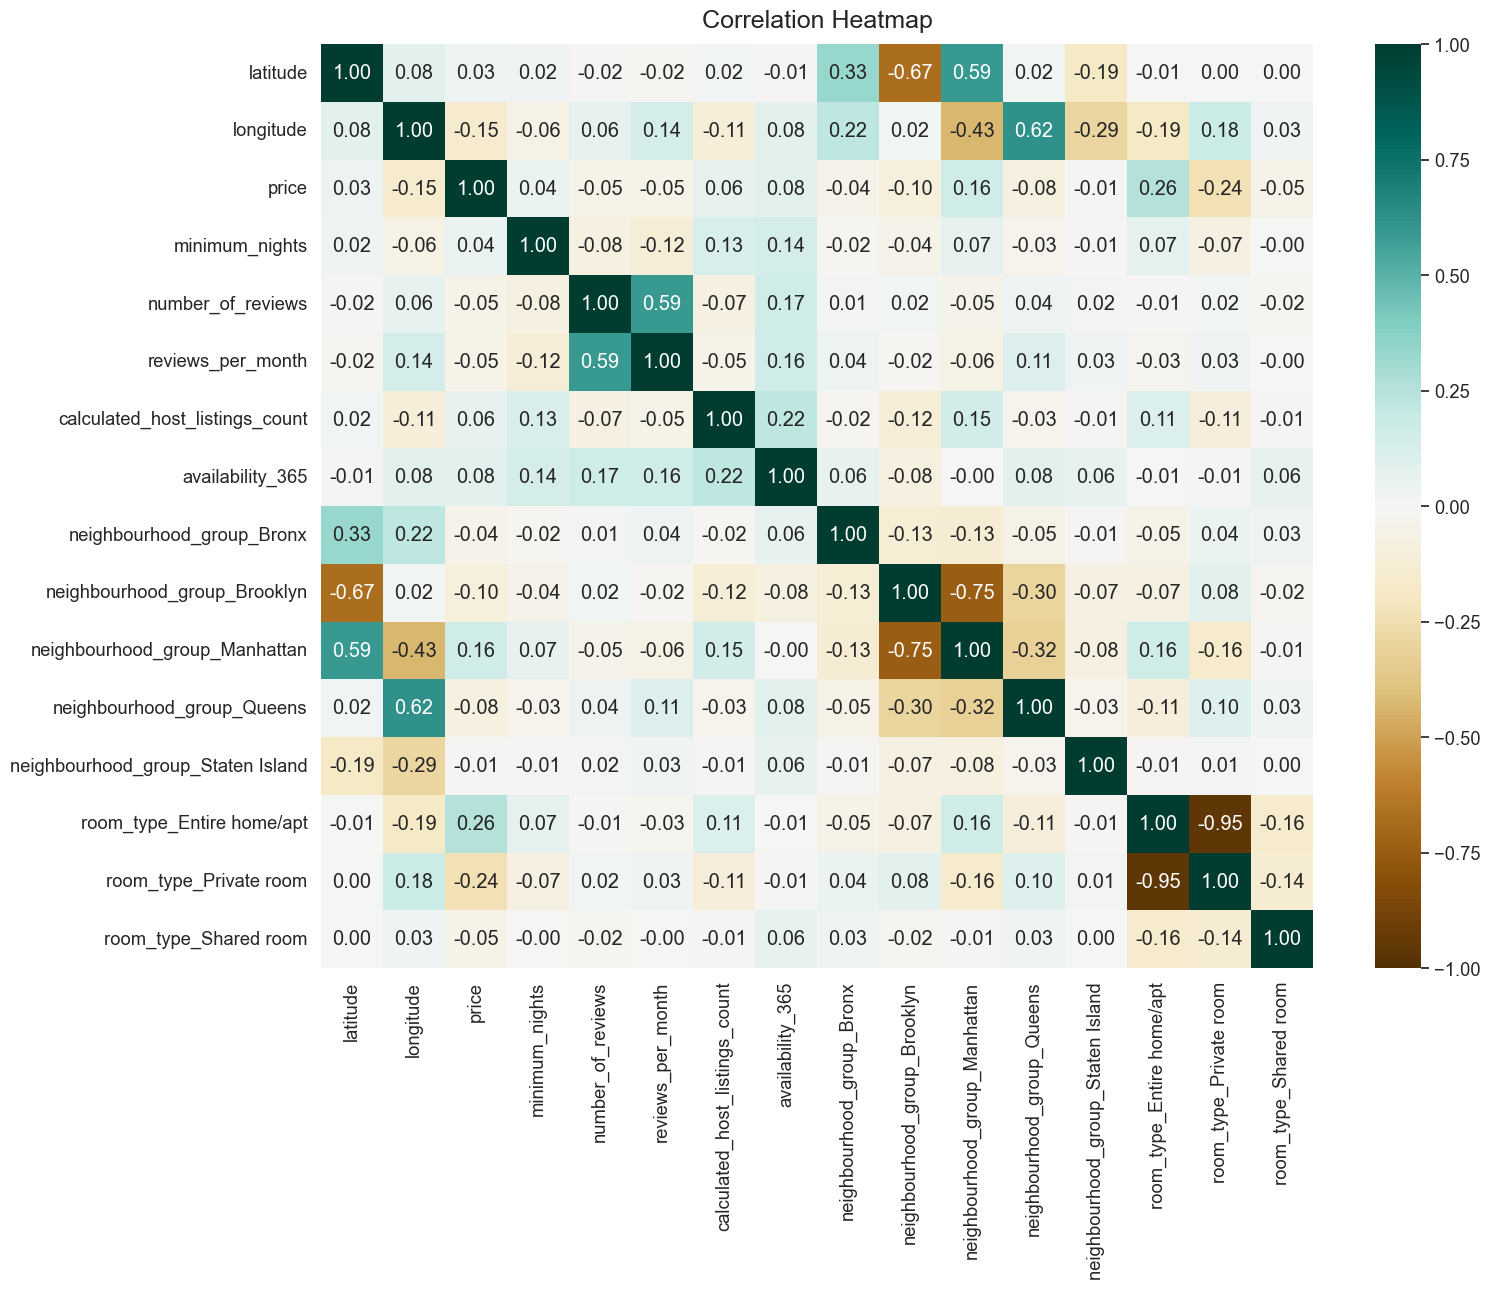

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las variables relevantes
selected_variables = ['neighbourhood_group', 'latitude', 'longitude', 'room_type', 'price',
                      'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                      'calculated_host_listings_count', 'availability_365']

# Seleccionar solo las columnas necesarias del DataFrame limpio
selected_data = base_b[selected_variables]

# Convertir variables categóricas en variables dummy
selected_data_encoded = pd.get_dummies(selected_data)

# Calcular la matriz de correlación
correlation_matrix = selected_data_encoded.corr()

# Ajustar el tamaño del mapa de calor y la fuente de la anotación
plt.figure(figsize=(16, 12))
sns.set(font_scale=1.2)

# Crear el mapa de calor de la matriz de correlación
heatmap = sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='BrBG', xticklabels=True, yticklabels=True)

# Añadir un título al mapa de calor
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

# Guardar el mapa de calor como un archivo PNG
plt.savefig('heatmap1.png', dpi=300, bbox_inches='tight')
plt.show()


## Ejercicio 2

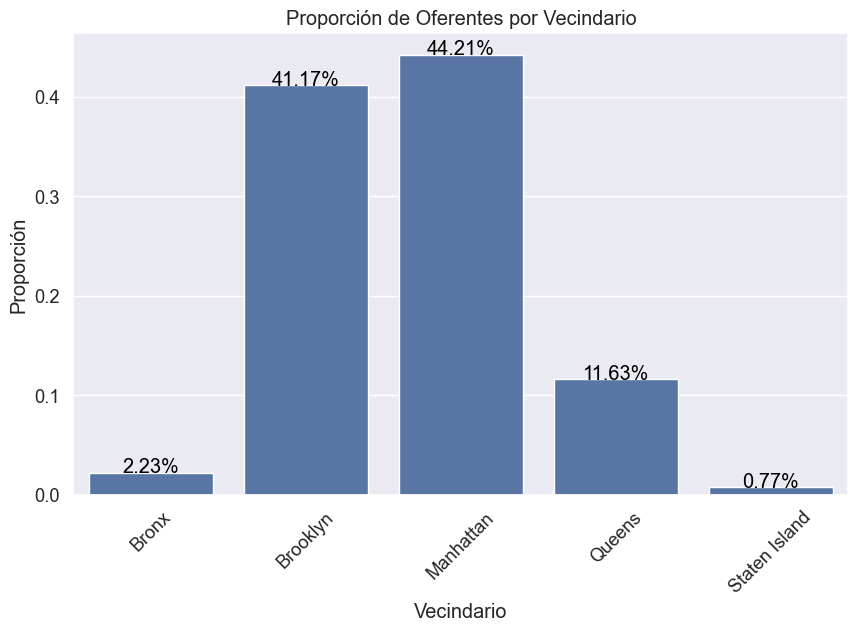

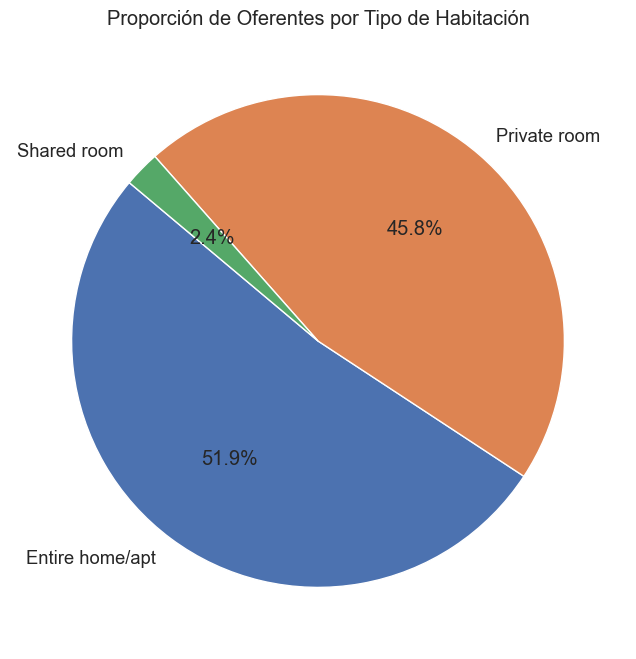

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el total de oferentes
total_oferentes = offer_counts_df['offer_group'].sum()

# Calcular la proporción de oferentes por vecindario
offer_counts_df['proporcion'] = offer_counts_df['offer_group'] / total_oferentes

# Etiquetas personalizadas para los vecindarios
neighborhood_labels = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

# Gráfico de barras para la proporción de oferentes por vecindario
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='index', y='proporcion', data=offer_counts_df)
plt.title('Proporción de Oferentes por Vecindario')
plt.xlabel('Vecindario')
plt.ylabel('Proporción')
plt.xticks(range(len(neighborhood_labels)), neighborhood_labels, rotation=45)

# Agregar porcentaje dentro de las barras
for index, row in offer_counts_df.iterrows():
    barplot.text(row.name, row.proporcion, f'{row.proporcion:.2%}', color='black', ha="center")

# Guardar el gráfico de barras
plt.savefig('proporcion_vecindario.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico de barras
plt.show()

# Calcular la proporción de oferentes por tipo de habitación
proporcion_por_tipo_habitacion = base_e[['room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room']].sum() / total_oferentes

# Etiquetas personalizadas para los tipos de habitación
room_type_labels = ['Entire home/apt', 'Private room', 'Shared room']

# Gráfico de pastel para la proporción de oferentes por tipo de habitación
plt.figure(figsize=(8, 8))
plt.pie(proporcion_por_tipo_habitacion, labels=room_type_labels, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Oferentes por Tipo de Habitación')

# Guardar el gráfico de pastel
plt.savefig('proporcion_habitacion.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico de pastel
plt.show()


## Ejercicio 3

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
data = pd.read_csv('Base_inciso_d.csv')

# Estadísticas de precios
precio_minimo = data['price'].min()
precio_maximo = data['price'].max()
precio_promedio = data['price'].mean()

print("Precio mínimo:", precio_minimo)
print("Precio máximo:", precio_maximo)
print("Precio promedio:", precio_promedio)

# Media de precio por "Neighbourhood group"
media_por_neighbourhood = data.groupby('neighbourhood_group')['price'].mean()
print("\nMedia de precio por 'Neighbourhood group':")
print(media_por_neighbourhood)

# Media de precio por tipo de habitación
media_por_room_type = data.groupby('room_type')['price'].mean()
print("\nMedia de precio por tipo de habitación:")
print(media_por_room_type)


Precio mínimo: 10.0
Precio máximo: 10000.0
Precio promedio: 151.64380554086983

Media de precio por 'Neighbourhood group':
neighbourhood_group
Bronx             87.780698
Brooklyn         123.742187
Manhattan        195.819337
Queens            97.167410
Staten Island    114.852151
Name: price, dtype: float64

Media de precio por tipo de habitación:
room_type
Entire home/apt    211.343150
Private room        88.214310
Shared room         70.337696
Name: price, dtype: float64


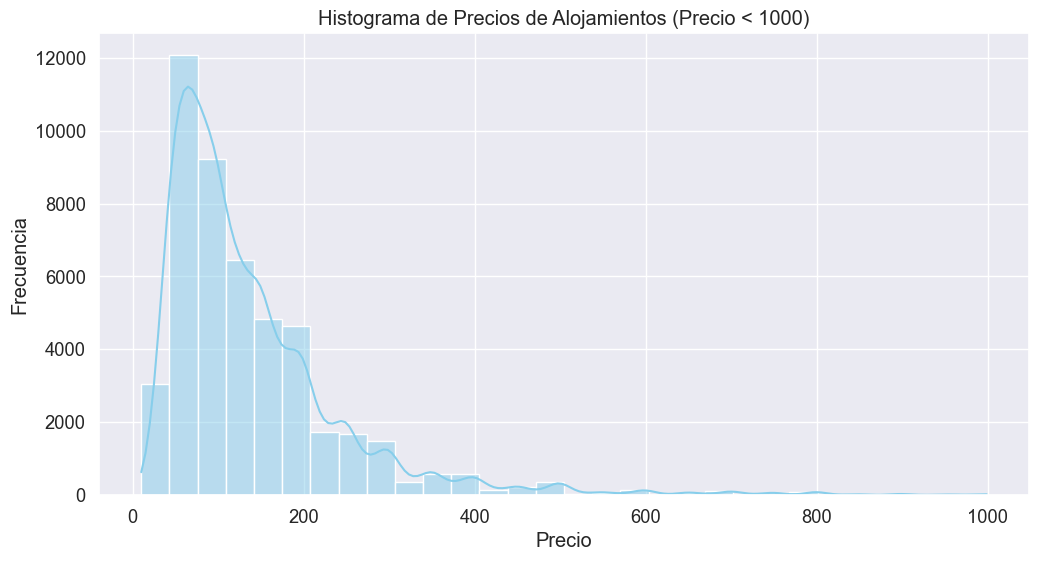

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los precios menores a 1000
base_d_filtered = base_d[base_d['price'] < 1000]

# Histograma de precios filtrados
plt.figure(figsize=(12, 6))
sns.histplot(data=base_d_filtered, x='price', bins=30, kde=True, color='skyblue')
plt.title('Histograma de Precios de Alojamientos (Precio < 1000)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.savefig('histograma_precios.png', dpi=300, bbox_inches='tight')  # Exportar el histograma como una imagen PNG
plt.show()

## Ejercicio 4

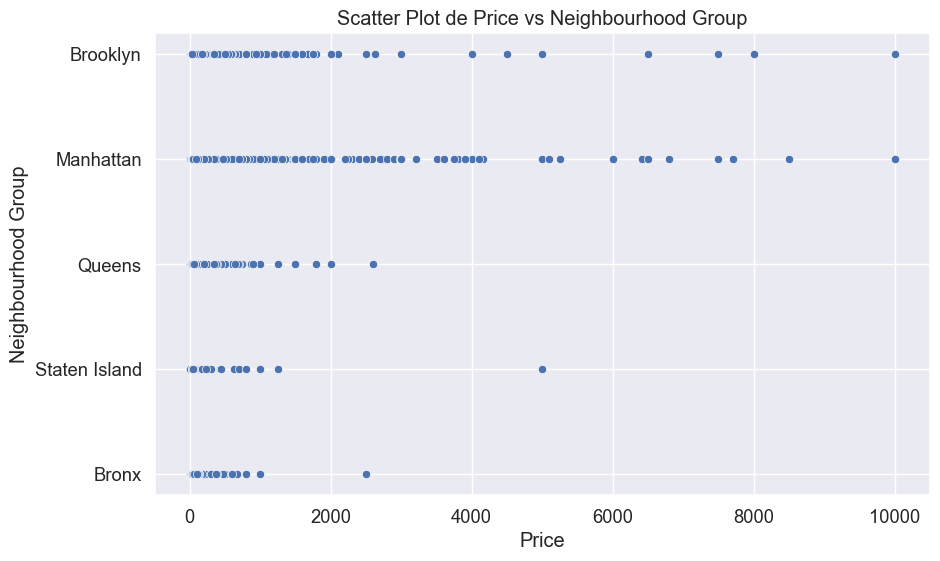

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=base_d, x='price', y='neighbourhood_group')

# Añadir título y etiquetas de los ejes
plt.title('Scatter Plot de Price vs Neighbourhood Group')
plt.xlabel('Price')
plt.ylabel('Neighbourhood Group')

# Guardar el gráfico como una imagen PNG
plt.savefig('scatter_plot1.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()


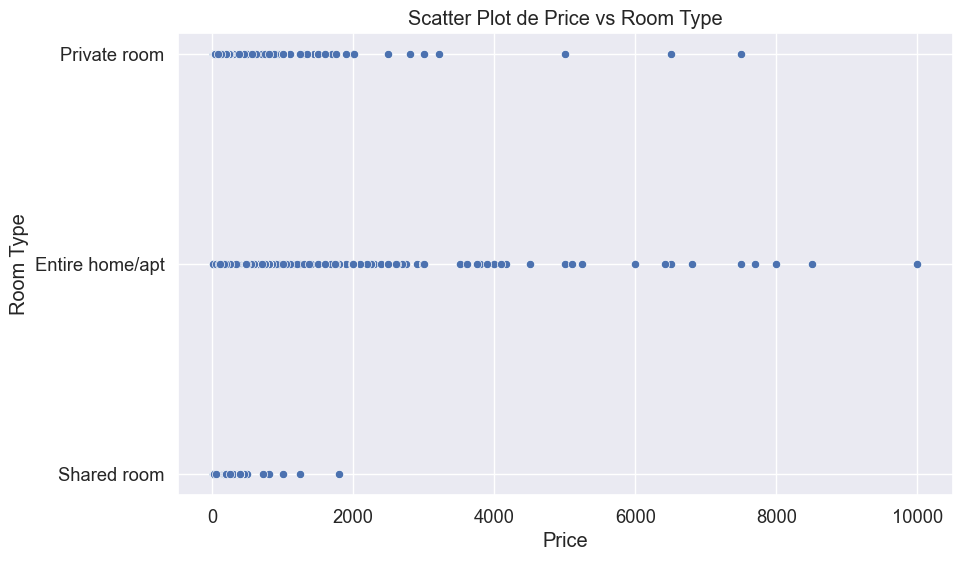

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=base_d, x='price', y='room_type')

# Añadir título y etiquetas de los ejes
plt.title('Scatter Plot de Price vs Room Type')
plt.xlabel('Price')
plt.ylabel('Room Type')

# Guardar el gráfico como una imagen PNG
plt.savefig('scatter_plot2.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

## Ejercicio 5

Varianza explicada: [0.22793762 0.18996756 0.1392926  0.1272027  0.10764468 0.08667301
 0.07260065 0.04868118]
Loadings:
 [[-3.25749370e-02  2.60928997e-01 -1.51444113e-01 -3.88061581e-01
   5.68178919e-01  5.99710338e-01 -2.64648397e-01  6.93489385e-02]
 [ 2.93983168e-02 -4.59473950e-02  1.57486323e-01  4.42142599e-01
   2.71170280e-01  2.44726653e-01  5.11310014e-01  6.17956447e-01]
 [-4.41549893e-01 -6.76995946e-01  5.05342359e-01 -1.86045742e-01
   1.70951879e-01  1.13509038e-01 -3.55503488e-02 -1.15557732e-01]
 [ 7.81185172e-01 -2.74894688e-04  5.98745179e-01 -1.23234653e-01
   3.47293489e-02  3.90674609e-02 -1.06781273e-01 -4.39596172e-02]
 [-4.04296775e-01  5.42369097e-01  5.10161788e-01 -9.85810126e-02
  -2.28793179e-01 -1.33038028e-01 -2.59211438e-01  3.67641958e-01]
 [-7.80950909e-02  2.60170251e-01  1.20958714e-01 -4.70145689e-01
  -1.51095078e-01  1.19088093e-01  7.58450010e-01 -2.79797255e-01]
 [-1.52037513e-01  3.14782944e-01  2.51435790e-01  5.92770382e-01
   2.38802193e

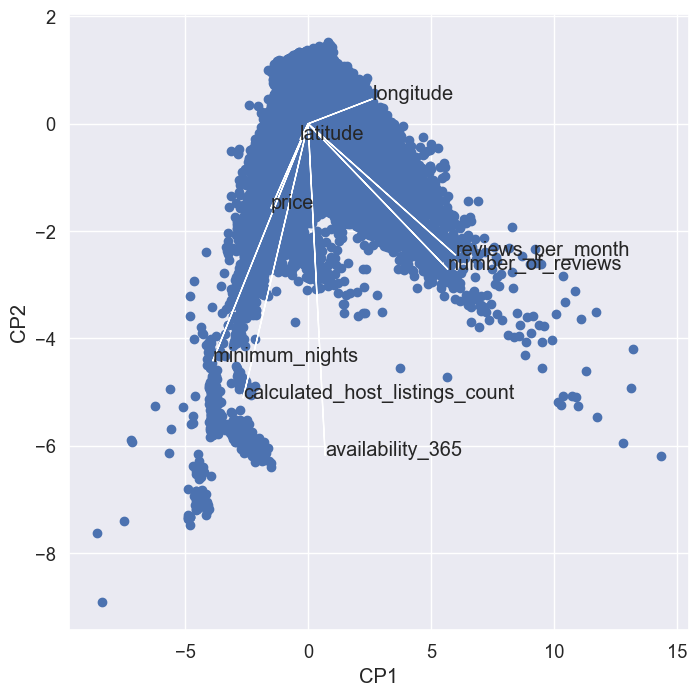

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Identificar columnas no numéricas
columnas_no_numericas = base_e.select_dtypes(exclude=['float64', 'int64']).columns.tolist()

# Escalar las variables
scaler = StandardScaler(with_std=True, with_mean=True)
base_e_numeric = base_e.drop(columns=columnas_no_numericas)  # Eliminar columnas no numéricas
base_e_transformed = pd.DataFrame(scaler.fit_transform(base_e_numeric), columns=base_e_numeric.columns)

# Ajustar el modelo PCA
pca = PCA()
base_e_pca = pca.fit_transform(base_e_transformed)

# Scores
scores = base_e_pca

# Porcentaje de la varianza explicada por los componentes
print("Varianza explicada:", pca.explained_variance_ratio_)

# Loadings vectors
loading_vectors = pca.components_
print("Loadings:\n", pca.components_)
print("Loadings del CP1:\n", pca.components_[0])

# Biplot
# Ajustes, extendemos longitud de las flechas e invertimos el eje y
i, j = 0, 1  # Componentes
scale_arrow = s_ = 10  # Para extender la longitud de las flechas y que se vean mejor.
scores[:,1] *= -1
pca.components_[1] *= -1  # Gira el eje y (CP2)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('CP%d' % (i+1))
ax.set_ylabel('CP%d' % (j+1))
for k in range(pca.components_.shape[1]):
    ax.arrow(0, 0, s_*pca.components_[i,k], s_*pca.components_[j,k])
    ax.text(s_*pca.components_[i,k], s_*pca.components_[j,k], base_e_numeric.columns[k])

plt.show()


In [23]:
print(pca.explained_variance_ratio_)

[0.22793762 0.18996756 0.1392926  0.1272027  0.10764468 0.08667301
 0.07260065 0.04868118]


In [146]:
%%capture
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) # 2 subplots uno al lado del otro
ticks = np.arange(pca.n_components_)+1 # para crear ticks en el eje horizontal
ax = axes[0]
ax.plot(ticks, pca.explained_variance_ratio_ , marker='o')
ax.set_xlabel('Componente principal');
ax.set_ylabel('Proporción de la varianza explicada por cada componente')
ax.set_ylim([0,1])
ax.set_xticks(ticks)

ax = axes[1]
ax.plot(ticks, pca.explained_variance_ratio_.cumsum(), marker='o') 
ax.set_xlabel('Componente principal')
ax.set_ylabel('Suma acumulada de la varianza explicada')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig

# Guardar el gráfico como imagen
plt.savefig('suma_acumulada_varianza_explicada_pca.png')


# Parte III: Predicción

In [24]:
# Required imports
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# Assuming 'base_e' is loaded elsewhere, ensure it's commented or properly loaded here.
# from ISLP import load_data

# Data preprocessing
base_e = pd.get_dummies(base_e, columns=['neighbourhood'])  # Convert 'neighbourhood' to dummies
base_e = base_e.drop(columns=['last_review'])  # Eliminate 'last_review' column

# Setting up the regression variables
y = base_e['price']
X = base_e.drop(columns=['price'])
X = sm.add_constant(X)  # Adding a constant column to include the intercept in the model

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=201)
print(f"Training dataset size: {len(X_train)} observations")
print(f"Test dataset size: {len(X_test)} observations")

# Linear Regression using scikit-learn
model_t = LinearRegression(fit_intercept=True).fit(X_train, y_train)
np.set_printoptions(suppress=True)  # Disable scientific notation for clarity

# Displaying coefficients
print("\nCoefficients:", model_t.coef_)
for n, coef in enumerate(model_t.coef_):
    print(f"{X_train.columns[n]}: {round(coef, 3)}")

# Linear Regression using statsmodels for detailed summary
results_t = sm.OLS(y_train, X_train.astype(float)).fit()
print(results_t.summary())

# Prediction and error metrics
y_train_pred = results_t.predict(X_train)
y_test_pred = results_t.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Comparing training and test MSE
print(f"Training MSE: {mse_train}")
print(f"Test MSE: {mse_test}")

# Addressing potential issue with training error being higher than test error
if mse_train > mse_test:
    print("It's unusual for training MSE to be higher than test MSE. Consider checking for overfitting or data leakage.")

Training dataset size: 33879 observations
Test dataset size: 14520 observations

Coefficients: [-4.27879818e+04 -7.33441225e+01 -9.35913038e+02 -1.79791901e+00
 -2.55213419e-01 -3.82552512e+00 -1.25516978e-01  2.32793939e-01
  3.86490286e+10  5.23455734e+10  4.11902617e+10  3.83058933e+10
  3.88496699e+10 -4.14965977e+10 -4.14965978e+10 -4.14965978e+10
  7.31893320e+08  5.31251615e+08  5.31251765e+08  1.07502862e+09
  1.07502849e+09 -1.29646517e+10 -1.80933961e+09 -1.29646517e+10
  1.07502860e+09  5.31251691e+08  7.31893318e+08  1.07502870e+09
  1.07502858e+09 -1.29646516e+10  1.07502857e+09  1.07502865e+09
  7.31893303e+08 -1.29646517e+10 -1.29646516e+10 -1.29646516e+10
 -1.29646517e+10  1.07502866e+09  1.07502856e+09 -1.29646516e+10
  7.31893279e+08 -1.29646516e+10 -1.29646516e+10  5.31251679e+08
 -1.29646516e+10  1.07502865e+09 -1.29646516e+10 -1.29646516e+10
  7.31893288e+08  5.31251830e+08 -1.80933979e+09 -1.80933986e+09
  7.31893487e+08 -1.80933987e+09  7.31893293e+08  7.31893329

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Cargar los datos
file_path = "Base_inciso_d.csv"  # Reemplaza con la ruta de tu archivo CSV
data = pd.read_csv(file_path)

# Procesamiento: crear variables dummy para las variables categóricas
data = data.drop(columns=['last_review']) 
categorical_features = ['neighbourhood_group', 'neighbourhood', 'room_type']
data = pd.get_dummies(data, columns=categorical_features)

# Definir variables para la regresión
y = data['price']
X = sm.add_constant(data.drop(columns=['price']))  # Agregar constante para statsmodels

# Configurar validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=201)

# Modelo de regresión Ridge
model = Ridge(alpha=1.0)

# Listas para almacenar los MSE de cada fold
mse_train_scores = []
mse_test_scores = []

# Aplicar validación cruzada manualmente
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Ajustar el modelo
    model.fit(X_train, y_train)
    
    # Predicciones
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calcular MSE
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    mse_train_scores.append(mse_train)
    mse_test_scores.append(mse_test)

# Calcular el MSE promedio de entrenamiento y prueba
mse_train_average = np.mean(mse_train_scores)
mse_test_average = np.mean(mse_test_scores)

# Impresión de resultados
print("MSE promedio de entrenamiento en validación cruzada: {:.2f}".format(mse_train_average))
print("MSE promedio de prueba en validación cruzada: {:.2f}".format(mse_test_average))


MSE promedio de entrenamiento en validación cruzada: 44436.88
MSE promedio de prueba en validación cruzada: 44941.19
